<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> Ill conditioned matrices </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.01</h2>
</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tclaudioe/Scientific-Computing-V3/blob/main/Bonus%20-%20current/Bonus%20-%2004%20-%20Ill%20conditioned%20matrices.ipynb)

<div id='toc' />

## Table of Contents
* [Introduction](#intro)
* [Hilbert Matrix](#hilbertmatrix)
    * [Looking at the numerical solution when the Hilbert matrix is used](#explicithilbertexample)
    * [The Vandermonde matrix](#vandermondematrix)
* [A less extreme case](#lessextremecase)
* [What can be done for **ill-conditioned** linear system of equations?](#preconditioner)
* [Conclusions](#conclusions)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.linalg import lu # type: ignore
import pandas as pd # type: ignore
from scipy.linalg import hilbert # type: ignore

import matplotlib # type: ignore
FS = 14
matplotlib.rc('xtick', labelsize=FS)
matplotlib.rc('ytick', labelsize=FS)
plt.rcParams.update({
    'font.size': FS,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{amsmath}'
})

<div id='intro' />

## Introduction
[Back to TOC](#toc)

In this Jupyter Notebook we will study the numerical solution of a linear system of equations with an ill-conditioned matrix.
We consider the following notation:
- $A$: an $n\times n$ real matrix.
- $\mathbf{b}$: an $n$ dimensional real vector.
- $\mathbf{x}$: the $n$ dimensional real vector that represents the **exact** solution.
- $\mathbf{x}_a$: a $n$ dimensional real vector that represents the **approximated** numerical solution found by a _solver_.
- $\|\cdot\|$: a vector norm. We will use here the $2$-norm.
- $\kappa(A)$: the **condition number**, which is defined as $\kappa(A)=\|A\|\,\left\|A^{-1}\right\|$. If the $2$-norm is used, we know that $\kappa(A)=\dfrac{\sigma_1}{\sigma_n}$, where $\sigma_1$ is the larges singular value of $A$ and $\sigma_n$ is the smallest singular value of $A$. 
Thus, the following inequality holds,
$$
\dfrac{1}{\kappa(A)}\dfrac{\|\mathbf{b}-A\,\mathbf{x}_a\|}{\|\mathbf{b}\|}
\leq 
\dfrac{\|\mathbf{x}-\mathbf{x}_a\|}{\|\mathbf{x}\|}
\leq
\kappa(A)\,\dfrac{\|\mathbf{b}-A\,\mathbf{x}_a\|}{\|\mathbf{b}\|}.
$$
The key points/question we will analyze numericall here are the followings:
1. One usually thinks that the use of a _numerical solver_ to find the _solution_, say $\mathbf{x}$, of a linear system of equations is enough to find an good approximation, i.e. $\mathbf{x}_a$.
2. How does the **matrix** of a linear system affects the conclusion that $\mathbf{x}_a$ is close to $\mathbf{x}$?
3. What can be done then? **This is beyond of this course but it is interesting to understand what can be done!**

<div id='hilbertmatrix' />

# Hilbert Matrix
[Back to TOC](#toc)

To _understand_ the previous inequality, we will start with a challenging example.
This example uses the _ill-conditioned_ Hilbert matrix, which we denote by $H_n$, where $n$ represents that it is an $n\times n$ matrix.
Thus, we will solve numerically the following linear system,
$$
A\,\mathbf{x}=\mathbf{b},
$$
where $A=H_n$ and we will define $\mathbf{b}$ as $H_n\,\mathbf{1}$, where $\mathbf{1}$ is a vector of ones of dimension $n$, i.e. $\mathbf{1}=\langle 1,1,\dots,1\rangle^\top \in \mathbb{R}^n$.
This ensures that we know in advace that the exact solution will be $\mathbf{x}=\mathbf{1}$.


In [2]:
N1 = 7
N2 = 20
F_errors=np.zeros(N2-N1+1)
B_errors=np.zeros(N2-N1+1)
kappas=np.zeros(N2-N1+1)
n_range=np.arange(N1,N2+1)
for k,n in np.ndenumerate(n_range):
    # This SciPy function build the Hilbert Matrix
    A=hilbert(n)
    # This defined the "exact" solution
    x=np.ones(n)
    # This computes the RHS
    b=np.dot(A,x)
    # Here we solve the linear system $A\,x_a=b$
    xa=np.linalg.solve(A,b)
    # Computing the relative "Forward error".
    F_errors[k]=np.linalg.norm(x-xa)/np.linalg.norm(x)
    # Computing the 2-norm condition number and store it
    kappas[k]=np.linalg.cond(A,2)
    # Computing the relative "Backward error" or also known as the "relative residual". 
    # NOTICE: This is the error (backward error) we actually we want to make small, but we usually only can measure the "forward error".
    B_errors[k]=np.linalg.norm(b-A @ xa)/np.linalg.norm(b)

The previous code performed a numuerical experiment for $n\in\{5,6,\dots,20\}$.

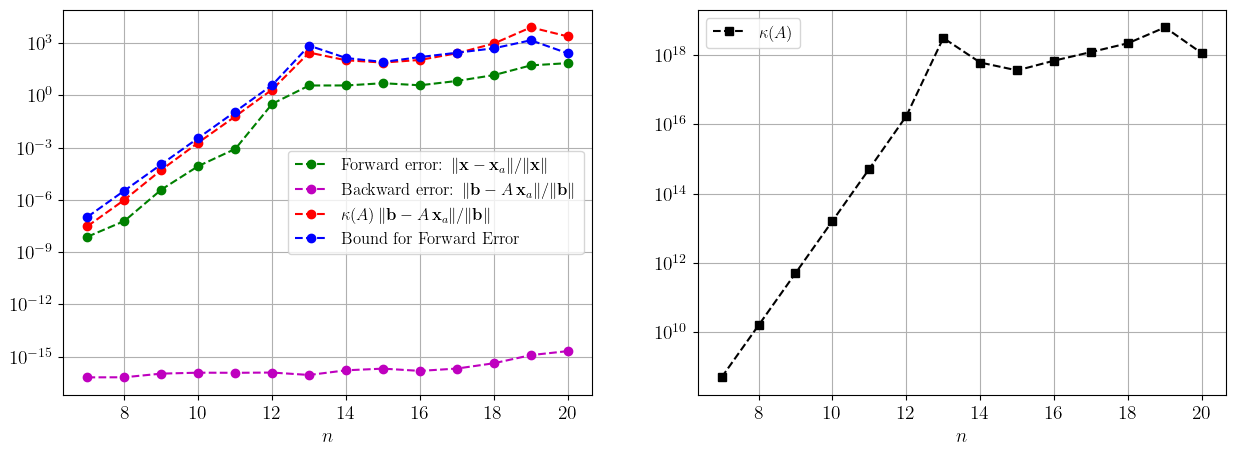

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.semilogy(n_range, F_errors, marker='o', linestyle='--', color='g',label=r'$\textrm{Forward error: }\|\mathbf{x}-\mathbf{x}_a\|/\|\mathbf{x}\|$')
plt.semilogy(n_range, B_errors, marker='o', linestyle='--', color='m',label=r'$\textrm{Backward error: }\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, kappas*B_errors, marker='o', linestyle='--', color='r', label=r'$\kappa(A)\,\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, np.power(2.,-52)*kappas, marker='o', linestyle='--', color='b',label=r'$\textrm{Bound for Forward Error}$')
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.subplot(122)
plt.semilogy(n_range, kappas, marker='s', linestyle='--', color='k',label=r'$\kappa(A)$')
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.show()

The undertsanding of the previous plots is the key to understand the inequality mentioned before.
For simplicity we will repeat here part of the inequality, if it can be _understood_, it can easily be extended to the other part.
Thus,
$$
\underbrace{\dfrac{\|\mathbf{x}-\mathbf{x}_a\|}{\|\mathbf{x}\|}}_{{\color{green}\displaystyle\textrm{Forward Error}}}
\leq
\underbrace{\underbrace{\kappa(A)}_{\displaystyle\textrm{Condition number}}\,
\underbrace{\dfrac{\|\mathbf{b}-A\,\mathbf{x}_a\|}{\|\mathbf{b}\|}}_{{\color{magenta}\displaystyle\textrm{Backward Error}}}}_
{
\begin{split}
    &\displaystyle{\textrm{The terms } {\color{red}\kappa(A_n)\,\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|}\textrm{ and }}
    \\ 
    &\displaystyle{{\color{blue}\textrm{Bound for Forward Error}}\textrm{ are computed}} \\
    &\displaystyle{\textrm{from this product.}}
\end{split}
}.
$$

To make the explanation very explicit, we will use the same color use in the plots.

1. The plot on the right shows **condition number** $\kappa(A)$ as a function of $n$, which in this **particular** case is the Hilbert matrix $H_n$. This plot shows that the **condition number** grows very fast, until it saturates about $n=13$.
2. <span style="color:green">The **Forward Error** computes how close the <ins>numerical solution</ins> $\mathbf{x}_a$ is to the <ins>exact solution</ins> $\mathbf{x}$. We always expect that $\mathbf{x}_a$ to be very close to $\mathbf{x}$.</span>
3. <span style="color:magenta">The **Backward Error** computes how "well" the <ins>numerical solution</ins> $\mathbf{x}_a$ satisfies the <ins>linear system of equations</ins> $A\,\mathbf{x}_a\approx \mathbf{b}$ by means of the computation of $\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$. We usually expect a very small value for $\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$, and in the best case we expect it to be $2^{-52}\approx 2.22\cdot 10^{-16}$, which is indeed what we observe in the plot on the left in **magenta**.</span>
4. <span style="color:red">This term just computes the product between the <span style="color:black">**condition number** $\kappa(A)$</span> and the <span style="color:magenta">**Backward Error** (or **relative residual**) $\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$</span>. The purpose of this product is to show that a good estimation for the <span style="color:green"> **Forward Error**</span> is not just the <span style="color:magenta">**Backward Error** (or **relative residual**)</span>, the analysis must take into account the role of the <span style="color:black">**condition number** $\kappa(A)$</span> , i.e. we can't assure $\mathbf{x}_a$ will be close to $\mathbf{x}$ if <span style="color:black"> $\kappa(A)$</span> is large.</span> 
5. <span style="color:blue">This last term in **blue** is computed as the product between the <span style="color:black">**condition number** $\kappa(A)$</span> and the "best" possible value for the <span style="color:magenta">**Backward Error** (or **relative residual**) $\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$</span>, which is $2^{-52}\approx 2.22\cdot 10^{-16}$. </span>

As a summary, 
- We conclude that for **ill-conditioned matrices**, i.e. matrices with **large** condition number $\kappa(A)$, the <span style="color:green">The **Forward Error**</span> is upper-bounded by the product between the <span style="color:black">**condition number** $\kappa(A)$</span>  and the <span style="color:magenta">**Backward Error** (or **relative residual**) $\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$</span>. Thus, making the <span style="color:magenta">**Backward Error**</span> small **may not be enough**.
- A <ins>rule-of-thumb</ins> usually associated to the **condition number** is that for ill-conditioned problems the expression $\lceil\log_{10}(\kappa(A))\rceil$ indicates the number of digits are lost when computing a numerical approximation. In our case, since we work with **double precision**, i.e. we usually expect to have the $16$ digits available to be correct, when the condition number of over $10^{16}$, it means we will lose all the digits in the computation!! This is not good news, so you must be aware if it.

<div id='explicithilbertexample' />

## Looking at the numerical solution when the Hilbert matrix is used 
[Back to TOC](#toc)

To understand tihe previous issue, we will solve a linear system of equations with $H_{20}$.
We first build the matrix and we then we compute its **condition number**:

In [4]:
# Size of the problem to be used. You can change it an see what happens!!
n = 20
# Generating the Hilbert matrix
A = hilbert(n)

# Computing the condition number.
kappa=np.linalg.cond(A,2)

print(r'The condition number kappa(A) is ',kappa)
print(r'For clarity, we compute the log_{10}(kappa(A)), which is ', np.log10(kappa))

The condition number kappa(A) is  1.1484020388436145e+18
For clarity, we compute the log_{10}(kappa(A)), which is  18.06009395486047


We now define the _exact_ solution $\mathbf{x}$ and we compute the approximated solution $\mathbf{x}_a$. We used the same procedure used before.

In [5]:
# Defining the 'exact' solution
x = np.ones(n)
# If we know the exact solution, we can compute the RHS just by multiplying 'A' by 'x'
b = A @ x
# Using the NumPy routine to solve the linear system of equations.
xa = np.linalg.solve(A,b) # A.x = A.1 = b

We compute the **relative Backward error**:

In [6]:
np.linalg.norm(b-np.dot(A,xa))/np.linalg.norm(b)

np.float64(2.0797113439267336e-15)

We now compute the **Forward error**. This is only possible since we know the exact solution by construction.

In [7]:
np.linalg.norm(x-xa)

np.float64(313.6033538425257)

In [8]:
comparing_solutions=np.zeros((n,2))
comparing_solutions[:,0]=x
comparing_solutions[:,1]=xa
df=pd.DataFrame(comparing_solutions, columns=["Exact solution", "Numerical solution"])
df.style.set_caption("Comparison between the exact solution and the NumPy-solver's solution")

,Exact solution,Numerical solution
0,1.000000,1.000001
1,1.000000,0.999746
2,1.000000,1.011012
3,1.000000,0.794026
4,1.000000,3.064379
5,1.000000,-11.299074
6,1.000000,46.617970
7,1.000000,-104.075805
8,1.000000,138.541752
9,1.000000,-57.564511


Just for reference, we plot the solutions:

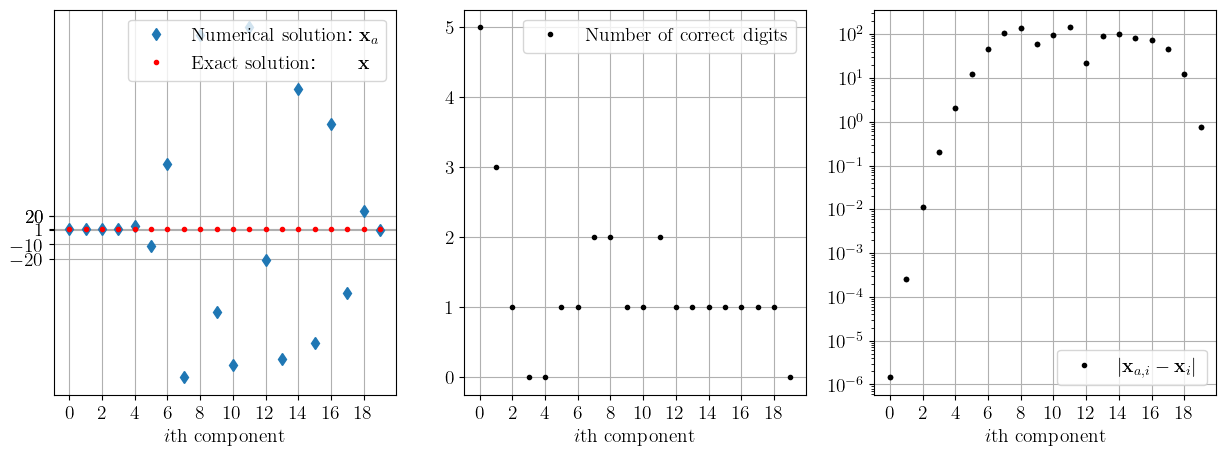

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(xa,'d',label=r'\textrm{Numerical solution}: $\mathbf{x}_a$')
plt.plot(x,'r.', label=r'\textrm{Exact solution}: $\quad\;\;\;\mathbf{x}$')
plt.xticks(np.arange(0,n,2))
plt.yticks([-20,-10,0,1,10,10],[r'$-20$',r'$-10$','',r'$1$',r'$10$',r'$20$'])
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(132)
plt.plot(np.floor(np.abs(np.log10(np.abs(x-xa)+np.power(2.,-52)))),'k.',label=r'\textrm{Number of correct digits}')
plt.xticks(np.arange(0,n,2))
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(133)
plt.semilogy(np.abs(x-xa)+np.power(2.,-52),'k.',label=r'$|\mathbf{x}_{a,i}-\mathbf{x}_i|$')
plt.semilogy(np.abs(x-xa),'k.')
plt.xticks(np.arange(0,n,2))
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.show()

<div id='vandermondematrix' />

# The Vandermonde matrix
[Back to TOC](#toc)

The Vandermonde matrix shows up in Polynomial Interpolation, in particular the matrix looks like as follows:

$$
V_n=
\begin{bmatrix}
    1 & x_1 & x_1^2 & \dots & x_1^{n-2} & x_1^{n-1}\\
    1 & x_2 & x_2^2 & \dots & x_2^{n-2} & x_2^{n-1}\\
    \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
    1 & x_{n-1} & x_{n-1}^2 & \dots & x_{n-1}^{n-2} & x_{n-1}^{n-1}\\
    1 & x_n & x_n^2 & \dots & x_n^{n-2} & x_n^{n-1}
\end{bmatrix},
$$
for which we know its determinant, which is:
$$
\textrm{det}\left(V_n\right)=
\prod_{1\leq i < j \leq n}(x_j-x_i).
$$
This expression tells us that the determinant will be different than $0$ as long as we have different $x_i\neq x_i$ for all $i\neq j$, and $i,j\in\{1,2,3,\dots,n\}$.

Now, we will perform a numerical experiment, similar to what we did in the previous section.
The only difference is that we will not use the Hilbert matrix but the Vandermonde matrix.

This means, we will be solving,
$$
V_n\,\mathbf{x}=\mathbf{b}.
$$

## First test

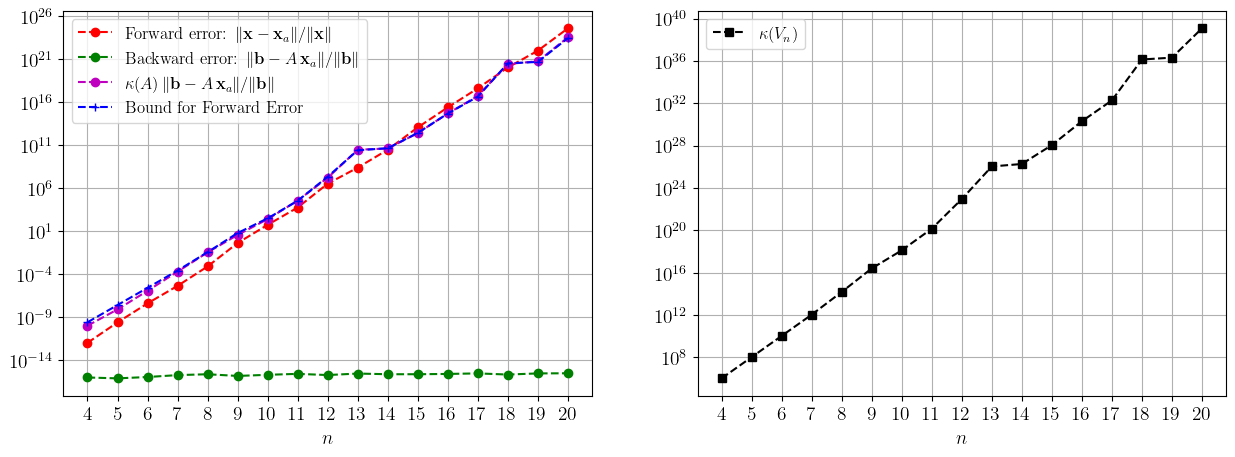

In [10]:
N1 = 4
N2 = 20
F_errors=np.zeros(N2-N1+1)
B_errors=np.zeros(N2-N1+1)
kappas=np.zeros(N2-N1+1)
n_range=np.arange(N1,N2+1)

# Fixing the 'seed' of the random number generator to obtain reproducible outcomes.
rng = np.random.Generator(np.random.PCG64(seed=0))

for k,n in np.ndenumerate(n_range):
    # Generating 'n' equalspaced points on [0,100]
    x = np.linspace(0,100,n)
    # Building the Vandermonde matrix
    V = np.vander(x, increasing=True)
    # Generating a random solution
    x = rng.standard_normal((n,n))
    # Building the RHS for the linear system of equations to be solved
    b = V @ x
    # Solving the associated linear system of equations
    xa = np.linalg.solve(V,b)
    # Computing Forward error:  ||x-xa||_2/||x||_2
    F_errors[k] = np.linalg.norm(x-xa)/np.linalg.norm(x)
    # Computing Backward error: ||b-A xa||_2/||b||_2
    B_errors[k] = np.linalg.norm(b - V @ xa)/np.linalg.norm(b)
    # Computing the condition number
    kappas[k]   = np.linalg.cond(V,2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.semilogy(n_range, F_errors, marker='o', linestyle='--', color='r',label=r'$\textrm{Forward error: }\|\mathbf{x}-\mathbf{x}_a\|/\|\mathbf{x}\|$')
plt.semilogy(n_range, B_errors, marker='o', linestyle='--', color='g',label=r'$\textrm{Backward error: }\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, kappas*B_errors, marker='o', linestyle='--', color='m', label=r'$\kappa(A)\,\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, np.power(2.,-52)*kappas, marker='+', linestyle='--', color='b',label=r'$\textrm{Bound for Forward Error}$')
plt.xticks(n_range)
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.subplot(122)
plt.semilogy(n_range, kappas, marker='s', linestyle='--', color='k',label=r'$\kappa(V_n)$')
plt.xlabel('$n$')
plt.grid(True)
plt.xticks(n_range)
plt.legend(loc='best',fontsize=12)

plt.show()

## Second test

What we see in the previous plots is the fact that solving a linear system with an ill condition matrix, like the Vandermonde matrix, it is definitely not a good idea.
Suggestion: What about if you interpolate the constant $1$ with the Vandermonde matrix, which we know that the exact solution will be the $p(x)=1$. 
This means that the constant term will be $1$ and all the other terms must be $0$.
Do you observe the same behavior?

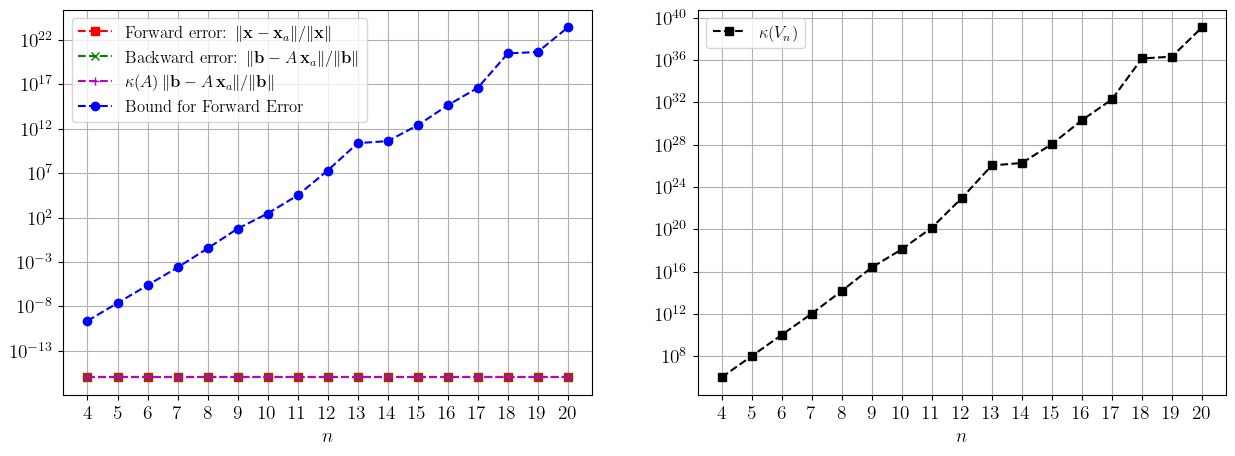

In [11]:
N1 = 4
N2 = 20
F_errors=np.zeros(N2-N1+1)
B_errors=np.zeros(N2-N1+1)
kappas=np.zeros(N2-N1+1)
n_range=np.arange(N1,N2+1)

for k,n in np.ndenumerate(n_range):
    # Generating 'n' equalspaced points on [0,100]
    x = np.linspace(0,100,n)
    # Building the Vandermonde matrix
    V = np.vander(x, increasing=True)
    # Generating a random solution
    x = np.zeros(n)
    x[0] = 1
    # Building the RHS for the linear system of equations to be solved
    b = V @ x
    # Solving the associated linear system of equations
    xa = np.linalg.solve(V,b)
    # Computing Forward error:  ||x-xa||_2/||x||_2
    F_errors[k] = np.linalg.norm(x-xa)/np.linalg.norm(x)
    # Computing Backward error: ||b-A xa||_2/||b||_2
    B_errors[k] = np.linalg.norm(b - V @ xa)/np.linalg.norm(b)
    # Computing the condition number
    kappas[k]   = np.linalg.cond(V,2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.semilogy(n_range, F_errors+1e-16, marker='s', linestyle='--', color='r',label=r'$\textrm{Forward error: }\|\mathbf{x}-\mathbf{x}_a\|/\|\mathbf{x}\|$')
plt.semilogy(n_range, B_errors+1e-16, marker='x', linestyle='--', color='g',label=r'$\textrm{Backward error: }\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, kappas*B_errors+1e-16, marker='+', linestyle='--', color='m', label=r'$\kappa(A)\,\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.semilogy(n_range, np.power(2.,-52)*kappas, marker='o', linestyle='--', color='b',label=r'$\textrm{Bound for Forward Error}$')
plt.xticks(n_range)
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.subplot(122)
plt.semilogy(n_range, kappas, marker='s', linestyle='--', color='k',label=r'$\kappa(V_n)$')
plt.xlabel('$n$')
plt.grid(True)
plt.xticks(n_range)
plt.legend(loc='best',fontsize=12)

plt.show()

What the provious example showed us is that even if the matriz is very ill-conditioned, we can still find particular cases when the direct solver works just fine.
Just recall this is a particular case and it does not mean it will generally work, but it is worth mention it.

<div id='lessextremecase' />

# A less extreme case
[Back to TOC](#toc)

In this case, we generate a $n\times n$ matrix where the coefficients are generated under a standarized normal distribution. For simplicity, we produce the plots right away since we already explained them before.

This example shows that the **condition number** does not grow that fast in this case, notice that the matrix is much larger here!!

**Notice that in this case, since the condition number $\kappa(A)$ is smaller than before, the <span style="color:green">Forward Error</span> can assure to be small when the <span style="color:magenta">Backward Error</span> is small**.

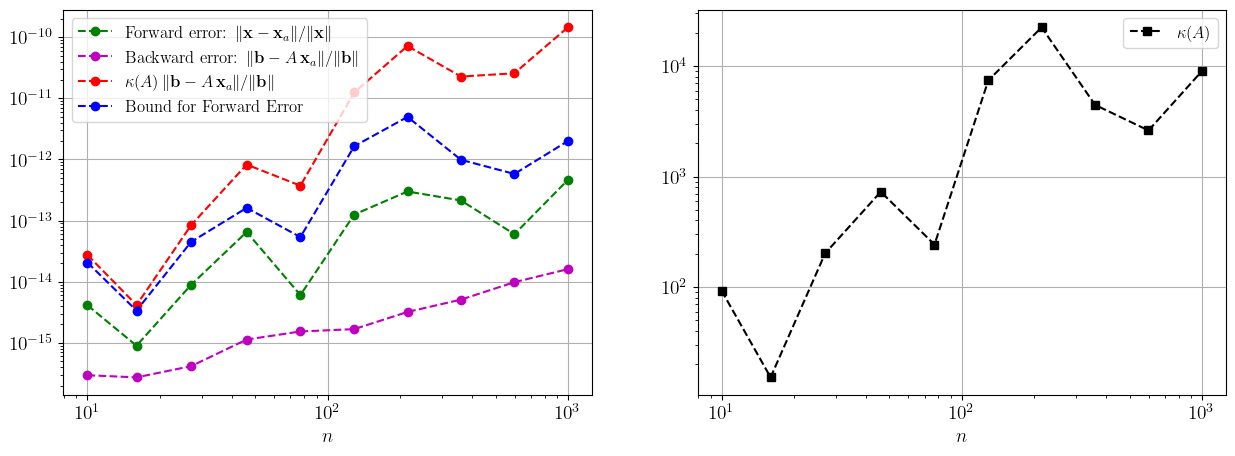

In [12]:
rng = np.random.Generator(np.random.PCG64(seed=0))

N = 10
skip = 10
F_errors=np.zeros(N)
B_errors=np.zeros(N)
kappas=np.zeros(N)
n_range=np.logspace(1,3,N,dtype=int)
for k,n in np.ndenumerate(n_range):
    # This SciPy function build the Hilbert Matrix
    A = rng.standard_normal((n,n))
    # This defined the "exact" solution
    x=np.ones(n)
    # This computes the RHS
    b=np.dot(A,x)
    # Here we solve the linear system $A\,x_a=b$
    xa=np.linalg.solve(A,b)
    # Computing the relative "Forward error".
    F_errors[k]=np.linalg.norm(x-xa)/np.linalg.norm(x)
    # Computing the 2-norm condition number and store it
    kappas[k]=np.linalg.cond(A,2)
    # Computing the relative "Backward error" or also known as the "relative residual". 
    # NOTICE: This is the error (backward error) we actually we want to make small, but we usually only can measure the "forward error".
    B_errors[k]=np.linalg.norm(b-A @ xa)/np.linalg.norm(b)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.loglog(n_range, F_errors, marker='o', linestyle='--', color='g',label=r'$\textrm{Forward error: }\|\mathbf{x}-\mathbf{x}_a\|/\|\mathbf{x}\|$')
plt.loglog(n_range, B_errors, marker='o', linestyle='--', color='m',label=r'$\textrm{Backward error: }\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.loglog(n_range, kappas*B_errors, marker='o', linestyle='--', color='r', label=r'$\kappa(A)\,\|\mathbf{b}-A\,\mathbf{x}_a\|/\|\mathbf{b}\|$')
plt.loglog(n_range, np.power(2.,-52)*kappas, marker='o', linestyle='--', color='b',label=r'$\textrm{Bound for Forward Error}$')
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.subplot(122)
plt.loglog(n_range, kappas, marker='s', linestyle='--', color='k',label=r'$\kappa(A)$')
plt.xlabel(r'$n$')
plt.grid(True)
plt.legend(loc='best',fontsize=12)

plt.show()

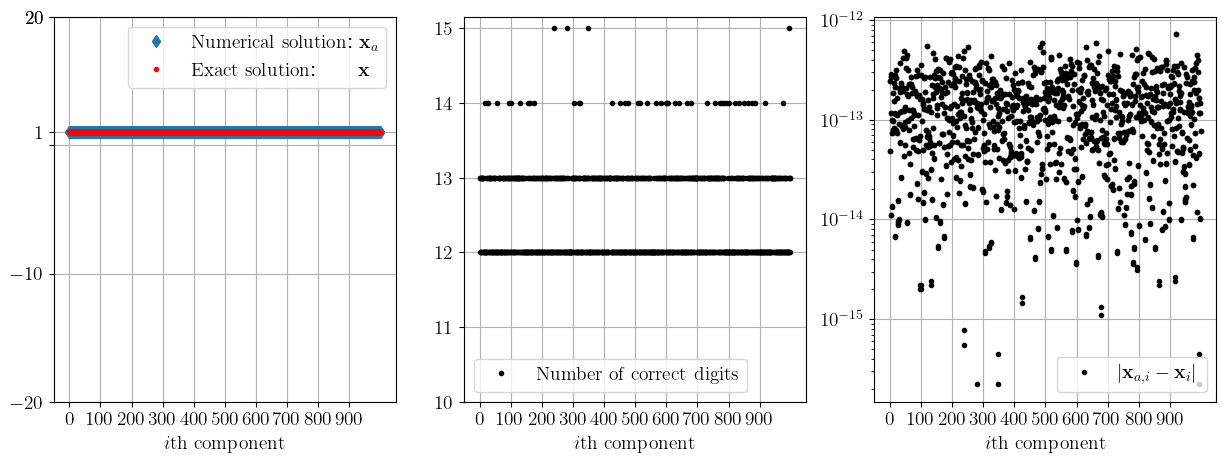

In [13]:
# Building the matrix
n = 1000
A = rng.standard_normal((n,n))

# Defining the 'exact' solution
x = np.ones(n)
# If we know the exact solution, we can compute the RHS just by multiplying 'A' by 'x'
b = A @ x
# Using the NumPy routine to solve the linear system of equations.
xa = np.linalg.solve(A,b) # A.x = A.1 = b

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(xa,'d',label=r'\textrm{Numerical solution}: $\mathbf{x}_a$')
plt.plot(x,'r.', label=r'\textrm{Exact solution}: $\quad\;\;\;\mathbf{x}$')
plt.xticks(np.arange(0,n,100))
plt.yticks([-20,-10,0,1,10,10],[r'$-20$',r'$-10$','',r'$1$',r'$10$',r'$20$'])
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(132)
plt.plot(np.floor(np.abs(np.log10(np.abs(x-xa)+np.power(2.,-52)))),'k.',label=r'\textrm{Number of correct digits}')
plt.xticks(np.arange(0,n,100))
plt.yticks(np.arange(10,16,1,dtype=int))
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(133)
plt.semilogy(np.abs(x-xa)+np.power(2.,-52),'k.',label=r'$|\mathbf{x}_{a,i}-\mathbf{x}_i|$')
plt.semilogy(np.abs(x-xa),'k.')
plt.xticks(np.arange(0,n,100))
plt.xlabel(r'\textrm{$i$th component}')
plt.grid(True)
plt.legend(loc='best')

plt.show()

<div id='preconditioner' />

# What can be done for **ill-conditioned** linear system of equations? (This is beyond this course but important!)
[Back to TOC](#toc)

If we really need to solve a linear system of equations that has a **ill-conditioned** matrix $A$, the alternative is the use of a preconditioner.
There exists at least two alternatives, a left preconditioner $M_L$ and a right preconditioner $M_R$.
For simplicity, we will only explain a left preconditioner and we will just call it $M$.

First, $M$ is a non-singular matrix of the same dimension of the original matrix such that solving a linear system of the form $M\,\mathbf{y}=\mathbf{c}$ is very simple/fast/well-conditioned.
As a <ins>rule-of-thumb</ins> one can say that the matrix $M$ is between the identity matrix $I$ and the original matrix $A$.
It can't be either on them, but the key point is that we expect that $\kappa\left(M^{-1}\,A\right)\ll \kappa(A)$.
This means that by _building_ a good precontitioner matrix $M$, it will imply that the conditioner number $\kappa\left(M^{-1}\,A\right)$ must be much smaller than the original condition number $\kappa(A)$.

So, how do we use a preconditioner?, or actually a left preconditioner?
The idea is straight forward, let's start from the original problem:
$$
\begin{align*}
    A\,\mathbf{x} &= \mathbf{b},\\
    M^{-1}\,A\,\mathbf{x} &= M^{-1}\,\mathbf{b},\quad \textrm{Multiply by $M^{-1}$ from the \textbf{left}.}
\end{align*}
$$
Now, we have a new _linear system of equations_, i.e. $M^{-1}\,A\,\mathbf{x} = M^{-1}$.
At this point, we notice that this new _linear system of equations_ must also satisfies the inequality we studied before, thus, if we apply it we obtain,
$$
\dfrac{1}{\kappa(M^{-1}\,A)}\dfrac{\|M^{-1}\,\mathbf{b}-M^{-1}\,A\,\mathbf{x}_a\|}{\|M^{-1}\,\mathbf{b}\|}
\leq 
\dfrac{\|\mathbf{x}-\mathbf{x}_a\|}{\|\mathbf{x}\|}
\leq
\kappa(M^{-1}\,A)\,\dfrac{\|M^{-1}\,\mathbf{b}-M^{-1}\,A\,\mathbf{x}_a\|}{\|M^{-1}\,\mathbf{b}\|}.
$$
This shows that the term in the _middle_ has not been affected by the **preconditioner** but the terms on the left and the right have been modified.
And the modification is very useful, in particular the modification of the condition number!
We now can assure that $\dfrac{\|\mathbf{x}-\mathbf{x}_a\|}{\|\mathbf{x}\|}$ be small as long as $\kappa(M^{-1}\,A)$ and $\dfrac{\|M^{-1}\,\mathbf{b}-M^{-1}\,A\,\mathbf{x}_a\|}{\|M^{-1}\,\mathbf{b}\|}$ are small.
This is very good news!
The only, and not small, issue is to find or desing a good preconditioner.


<div id='conclusions' />

# Conclusions
[Back to TOC](#toc)

1. Whenever we solve a linear system of equations, we need to be aware for the **condition number** $\kappa(A)$ of the corresponding matrix.
2. An important <ins>rule-of-thumb</ins> is that $\lceil\log_{10}(\kappa(A))\rceil$ gives us the number of digits we may be lost when computing a numerical solution $\mathbf{x}_a$ for a linear system of equations $A\,\mathbf{x}=\mathbf{x}$.
3. The **condition number** is not _bad_ for all linear system of equations as shown in [A less extreme case](#lessextremecase).
4. A preconditioner may be very useful!

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl` and `claudio.torres@usm.cl`) : Description and code updated. _DI UTFSM. May 2024._
* _Update March 2025 - v1.01 - C.Torres_ : Adding Colab link.